In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#### Loading Data


In [4]:
df = pd.read_csv("dataset/Edited_data.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cohort
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44


#### Deleting unnecessary data

In [5]:
df = df.drop("age_cohort",axis= 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9281,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9282,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9283,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9284,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Getting all the necessary info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286 entries, 0 to 9285
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9286 non-null   int64  
 1   Geography        9286 non-null   object 
 2   Gender           9286 non-null   object 
 3   Age              9286 non-null   int64  
 4   Tenure           9286 non-null   int64  
 5   Balance          9286 non-null   float64
 6   NumOfProducts    9286 non-null   int64  
 7   HasCrCard        9286 non-null   int64  
 8   IsActiveMember   9286 non-null   int64  
 9   EstimatedSalary  9286 non-null   float64
 10  Exited           9286 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 798.1+ KB


No NaN values found, most part of the data is numeric

#### Getting all the numeric columns

In [7]:
numeric_data = df.select_dtypes(include='number')
numeric_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9281,771,39,5,0.00,2,1,0,96270.64,0
9282,516,35,10,57369.61,1,1,1,101699.77,0
9283,709,36,7,0.00,1,0,1,42085.58,1
9284,772,42,3,75075.31,2,1,0,92888.52,1


#### Getting all the categorical data

In [8]:
categorical_data = df.select_dtypes(exclude='number')
categorical_data

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9281,France,Male
9282,France,Male
9283,France,Female
9284,Germany,Male


There are only 2 columns to encode

#### Creating the boxplots of all numeric data to see the anomalies and to clean the data afterwards

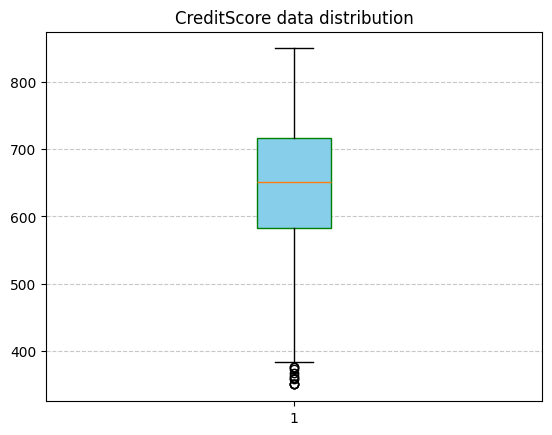

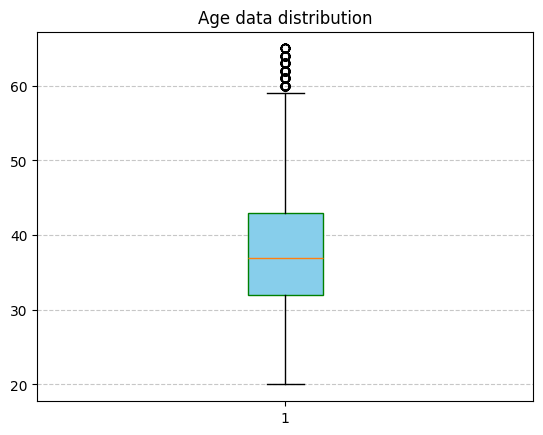

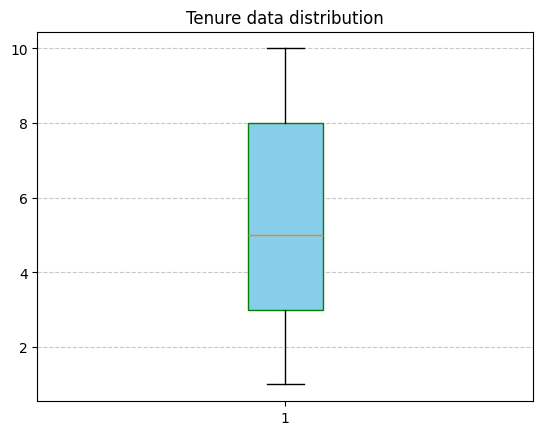

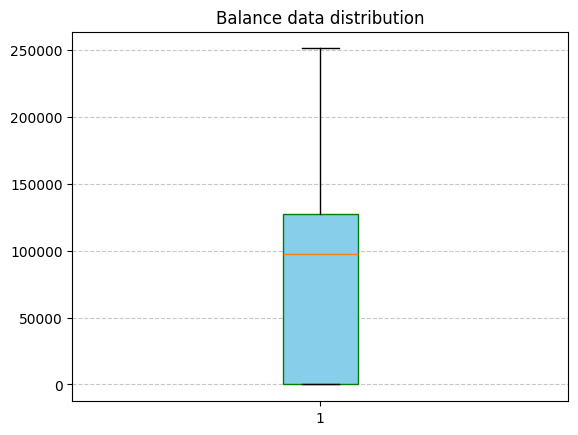

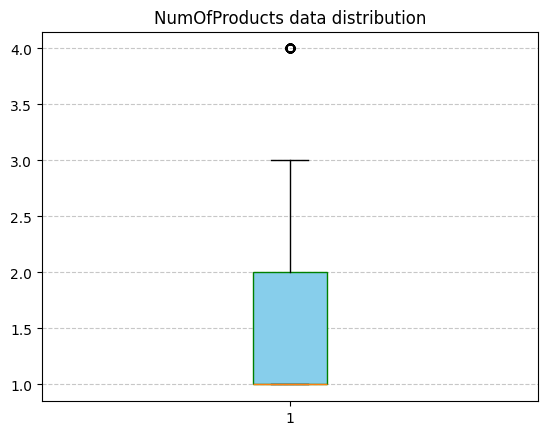

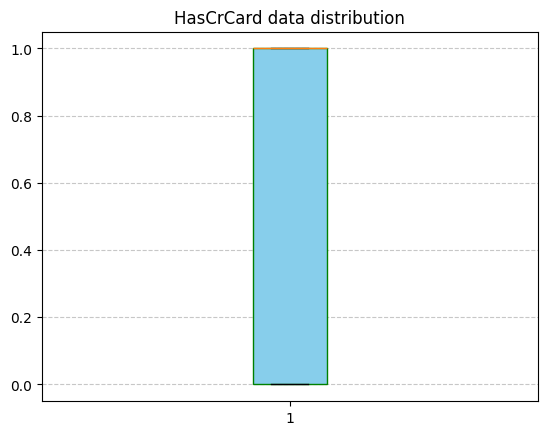

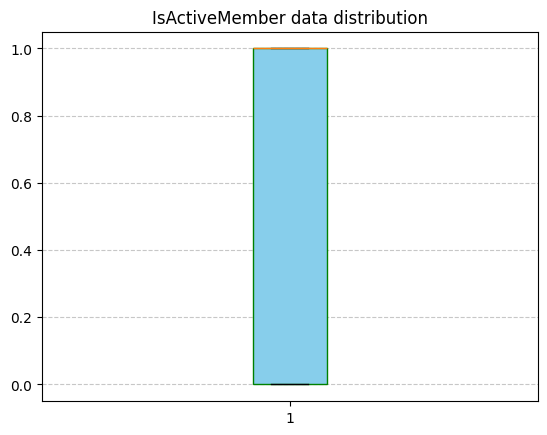

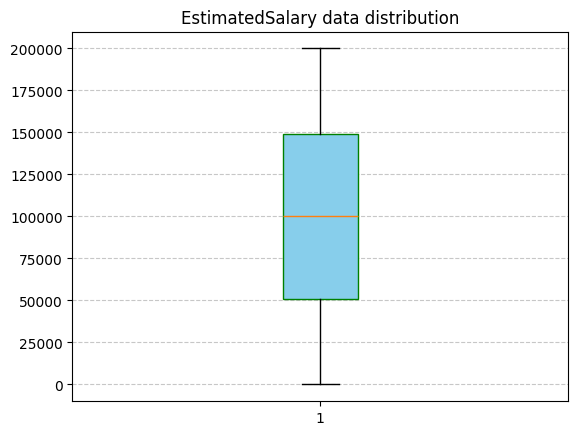

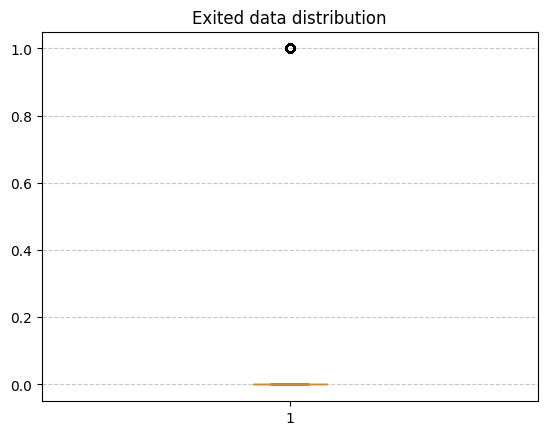

In [9]:
for i in numeric_data.columns:
    fig, ax = plt.subplots()
    bplot = ax.boxplot(numeric_data[i], patch_artist=True)
    for patch in bplot['boxes']:
        patch.set_facecolor(color="skyblue")
        patch.set_edgecolor(color="green")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.title(f"{i} data distribution")
        plt.savefig(f"img/boxplots/{i}_plot.png")
        plt.show()

Credit Score data has some anomalies, it's better to clean the data. Age column also has some anomalies but this data was cleaned before, there is no need to clean it now

#### Checking the distribution of exited data 

In [10]:
numeric_data["Exited"].value_counts()

Exited
0    7381
1    1905
Name: count, dtype: int64

The number of people who stayed is much bigger than those who left. Need to normalize the data for the model

#### Creating encoder and encoding the categorical data 

In [14]:
categorical_cols = categorical_data.columns
encoded_data = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
encoded_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9282,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9283,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9284,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [15]:
encoded_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [18]:
preprocessed_data = encoded_data
preprocessed_data[preprocessed_data.select_dtypes(bool).columns] = preprocessed_data.select_dtypes(bool).astype(int)
preprocessed_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9282,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9283,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9284,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


#### Cleaning the CreditScore data

In [19]:
preprocessed_data = preprocessed_data[preprocessed_data["CreditScore"] >=400]
preprocessed_data.shape

(9271, 14)

Now, need to check the credit score data distribution to see how the data has changed

#### Creating the boxplot of credit score data

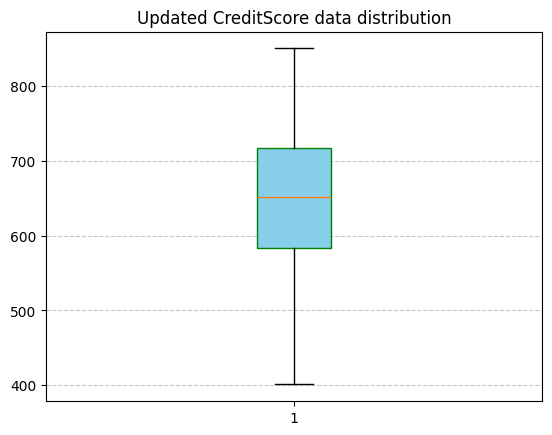

In [20]:
fig, ax = plt.subplots()
bplot = ax.boxplot(preprocessed_data["CreditScore"], patch_artist=True)
for patch in bplot['boxes']:
        patch.set_facecolor(color="skyblue")
        patch.set_edgecolor(color="green")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.title("Updated CreditScore data distribution")
        plt.savefig(f"img/boxplots/creditScore_cleaned_plot.png")
        plt.show()

As we can see the data is clean now. There are no anomalies in credit score


#### Creating the data correation heatmap 

Now we can see the correlation and dependancies in cleaned data to predict which columns model will use to classify whether user left the site or not 

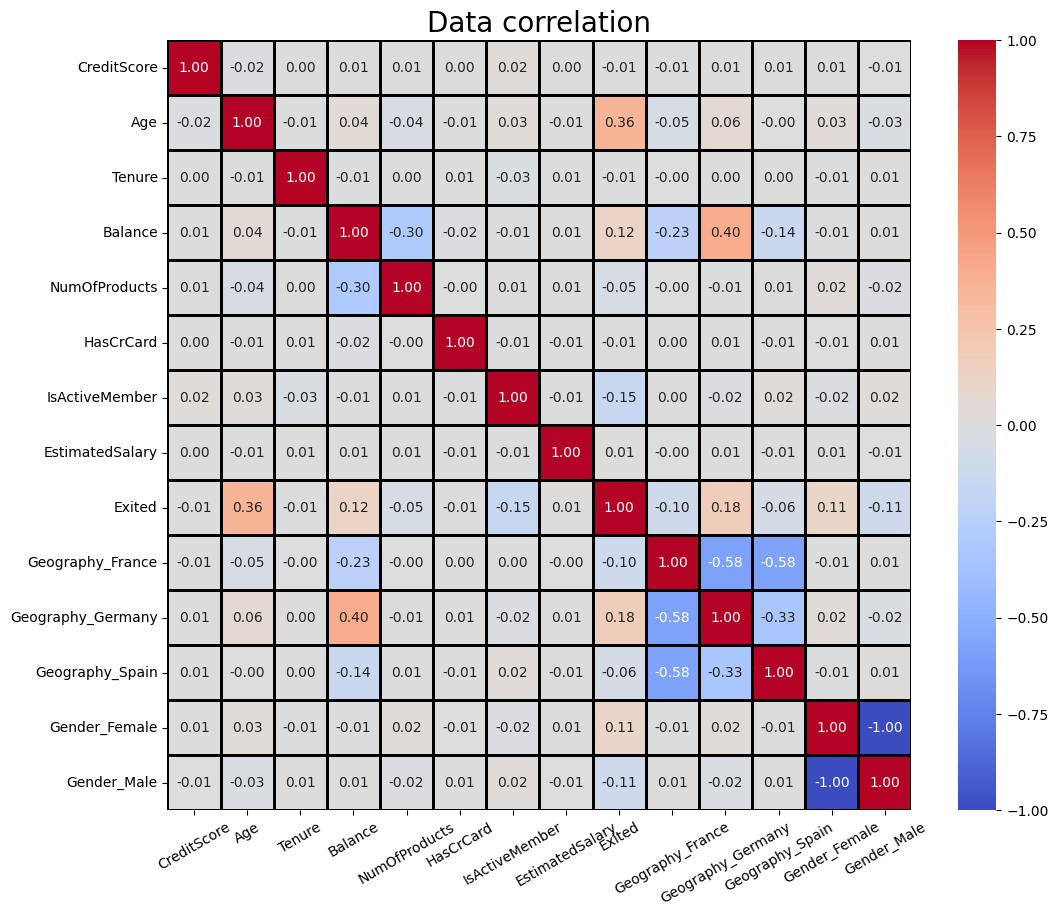

In [21]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(preprocessed_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=1, linecolor='black')
plt.title("Data correlation", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.savefig("img/data_correlation.png")
plt.show()

#### Correlation conclusions
- The strongest correlation is between Exited and Age values(0.36)
- Column Geography_Germany also has a good correlation with target(0.18)  
- Active Member column also has connection to the exited data(-0.15)
- Balance value also has 12% correlation with the target data.

The result is not as good as suppoused to be 

#### Saving the preprocessed data

In [22]:
preprocessed_data.to_csv("dataset/preprocessed_data.csv", index=False)